# Project Title

**Aidan O'Keefe**

SOLAR PANEL IMAGE GOES HERE

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

A time series analysis and modeling of solar power output in the United States.

Business and data understanding: what kind of data are you using, and what makes it well-suited for the business problem?<br>
<br>
You do not need to include any data visualizations in your summary, but consider including relevant descriptive statistics<br>
<br>
Data preparation: why did you choose the data preparation steps that you did, and what was the result?
This should be specific to the kind of data you are working with. For example, if you are doing an NLP project, what did you decide to do with stopwords?<br>
<br>
Be sure to list the packages/libraries used to prepare the data, and why<br>
<br>
Modeling: what modeling package(s) did you use, which model(s) within the package(s), and what tuning steps did you take?<br>
<br>
For some projects there may be only one applicable package; you should still briefly explain why this was the appropriate choice<br>
<br>
Evaluation: how well did your final model perform?
Include one or more relevant metrics
Be sure to briefly describe your validation approach


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

From the U.S. Energy Information Administration's website. 

NM = Not meaningful due to large relative standard error.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
#Importing relevant libraries and tools

#Import standard libraries
import numpy as np
import pandas as pd
from scipy import stats as stats

#Import visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Time-Series
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

#Stats Models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Facebook Prophet



#View all columns in our dataframes
pd.options.display.max_columns = None
pd.options.display.width = None

import warnings
warnings.filterwarnings('ignore')

In [2]:
# code here to explore your data

In [3]:
#Import our data and preview the first five rows

#ALL SOLAR DATAFRAME
full_solar_df = \
pd.read_csv('/Users/Aidan/Documents/Flatiron/Phase_4/Solar_Power_Output_Time_Series/data/Net_generation_for_all_solar.csv',
            skiprows=4)

full_solar_df.head()

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,Sep 2001,Oct 2001,Nov 2001,Dec 2001,Jan 2002,Feb 2002,Mar 2002,Apr 2002,May 2002,Jun 2002,Jul 2002,Aug 2002,Sep 2002,Oct 2002,Nov 2002,Dec 2002,Jan 2003,Feb 2003,Mar 2003,Apr 2003,May 2003,Jun 2003,Jul 2003,Aug 2003,Sep 2003,Oct 2003,Nov 2003,Dec 2003,Jan 2004,Feb 2004,Mar 2004,Apr 2004,May 2004,Jun 2004,Jul 2004,Aug 2004,Sep 2004,Oct 2004,Nov 2004,Dec 2004,Jan 2005,Feb 2005,Mar 2005,Apr 2005,May 2005,Jun 2005,Jul 2005,Aug 2005,Sep 2005,Oct 2005,Nov 2005,Dec 2005,Jan 2006,Feb 2006,Mar 2006,Apr 2006,May 2006,Jun 2006,Jul 2006,Aug 2006,Sep 2006,Oct 2006,Nov 2006,Dec 2006,Jan 2007,Feb 2007,Mar 2007,Apr 2007,May 2007,Jun 2007,Jul 2007,Aug 2007,Sep 2007,Oct 2007,Nov 2007,Dec 2007,Jan 2008,Feb 2008,Mar 2008,Apr 2008,May 2008,Jun 2008,Jul 2008,Aug 2008,Sep 2008,Oct 2008,Nov 2008,Dec 2008,Jan 2009,Feb 2009,Mar 2009,Apr 2009,May 2009,Jun 2009,Jul 2009,Aug 2009,Sep 2009,Oct 2009,Nov 2009,Dec 2009,Jan 2010,Feb 2010,Mar 2010,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012,Jan 2013,Feb 2013,Mar 2013,Apr 2013,May 2013,Jun 2013,Jul 2013,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020,Jan 2021,Feb 2021,Mar 2021,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022
0,Net generation for all solar,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All sectors,thousand megawatthours,ELEC.GEN.TSN-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

I had to skip the first 4 rows as our column headers did not start until row 5.

We do not need the first two rows so let's drop them.

In [4]:
full_solar_df = full_solar_df.loc[2:,:]

In [5]:
full_solar_df.shape

(62, 267)

Currently we have 62 entries. Eventually we will split our data into individual dataframes (one for each US State, one for each US Region, and one for the entire United States).

In [6]:
full_solar_df.columns

Index(['description', 'units', 'source key', 'Jan 2001', 'Feb 2001',
       'Mar 2001', 'Apr 2001', 'May 2001', 'Jun 2001', 'Jul 2001',
       ...
       'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022', 'Jul 2022', 'Aug 2022',
       'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022'],
      dtype='object', length=267)

The 264 columns (starting with Jan 2001) will become our date time index.

Let's separate our `full_solar_df` into individual dataframes.

In [7]:
# for i, location in enumerate(full_solar_df['Location']):
# #     print(i, location)
#     location_solar_df = full_solar_df[full_solar_df['Location'] == location]\
#     .drop(['Location','units', 'source key'], axis =1).T
#     print(location_solar_df)

In [8]:
# def preprocess_solar(full_solar_df):
#     for location in full_solar_df['Location']:
#         location_solar_df = full_solar_df[full_solar_df['Location'] == location]\
#         .drop(['Location','units', 'source key'], axis =1).T
        
#         location_solar_df.index = pd.to_datetime(location_solar_df.index, format="%b %Y")
        
#         location_solar_df.rename(columns = {location_solar_df.columns[0]:'Solar Output (tmwh)'}, inplace=True)
        
#         location_solar_df['Solar Output (tmwh)'] = location_solar_df['Solar Output (tmwh)'].astype(int)
#         location_solar_df = location_solar_df.loc['2014-01-01':]
                          
#     print(location_solar_df)
    
#     return location_solar_df

Clean up `description` column

In [9]:
#Remove "All Sectors : " from place name in the description column
full_solar_df['Location'] = [i[14:] for i in full_solar_df['description']]

#Drop the old 'description column', bring our new column to the left of our dataframe, and reset the index
full_solar_df = full_solar_df.drop('description', axis=1).set_index('Location').reset_index()

####  US Dataframe

In [10]:
#Create a new dataframe using only the United States row, drop non-date columns, and transpose our dataframe
us_solar_df = full_solar_df[full_solar_df['Location'] == "United States"]\
.drop(['Location','units', 'source key'], axis =1).T

In [11]:
#Turn our new index of dates into datetime datatypes
us_solar_df.index = pd.to_datetime(us_solar_df.index, format="%b %Y")

In [12]:
#Rename our column with our values to Solar Output (thousand megawatthours)
us_solar_df.rename(columns = {0:'Solar Output (tmwh)'}, inplace=True)

In [13]:
#It looks like our column is properly labelled but its datatype is an object rather than number
us_solar_df.columns

Index(['Solar Output (tmwh)'], dtype='object')

In [14]:
#Replace "--"  values meaning no Solar Ouput with 0
us_solar_df['Solar Output (tmwh)'].replace(to_replace='--', value=0, inplace=True)

#Check to see if we now have zeros instead of hyphens
us_solar_df['Solar Output (tmwh)']

2001-01-01        0
2001-02-01        0
2001-03-01        0
2001-04-01        0
2001-05-01        0
              ...  
2022-08-01    20352
2022-09-01    18786
2022-10-01    17042
2022-11-01    12336
2022-12-01    10534
Name: Solar Output (tmwh), Length: 264, dtype: object

In [15]:
#Changing our Solar Output column into integer datatypes
us_solar_df['Solar Output (tmwh)'] = us_solar_df['Solar Output (tmwh)'].astype(int)

In [16]:
#View our fully transformed dataframe
us_solar_df

,Solar Output (tmwh)
2001-01-01,0
2001-02-01,0
2001-03-01,0
2001-04-01,0
2001-05-01,0
...,...
2022-08-01,20352
2022-09-01,18786
2022-10-01,17042
2022-11-01,12336


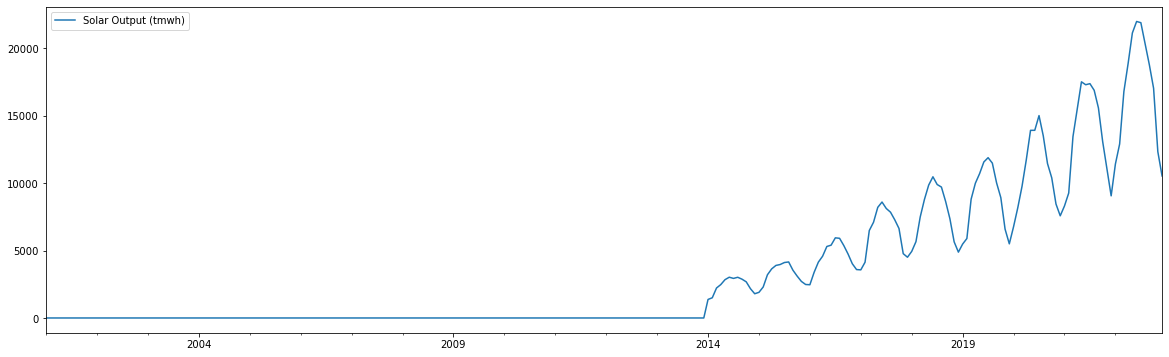

In [17]:
# Let's plot our new dataframe to see what our data looks like
us_solar_df.plot(figsize = (20,6));

There doesn't seem to be any solar power output in the US before 2014. Let's zoom in to our data after that point. 

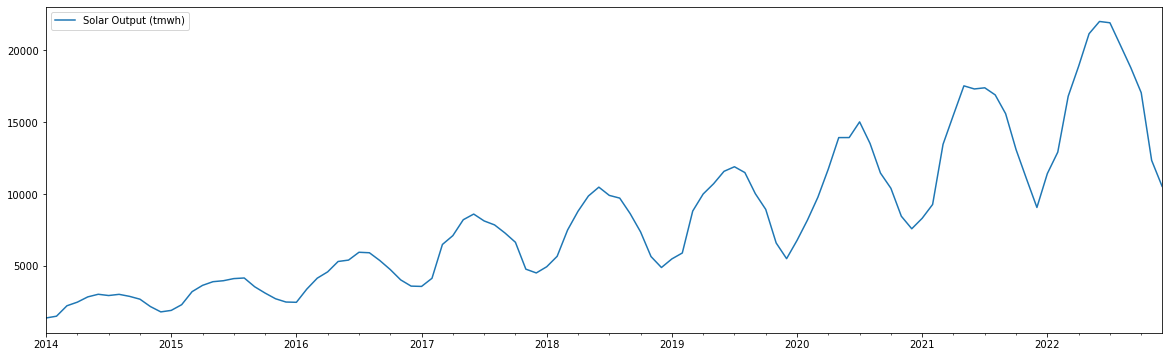

In [18]:
#New dataframe limited to Jan 2014 and afterwards.
us_solar_df = us_solar_df.loc['2014-01-01':]

#Plot our data
us_solar_df.plot(figsize = (20,6));

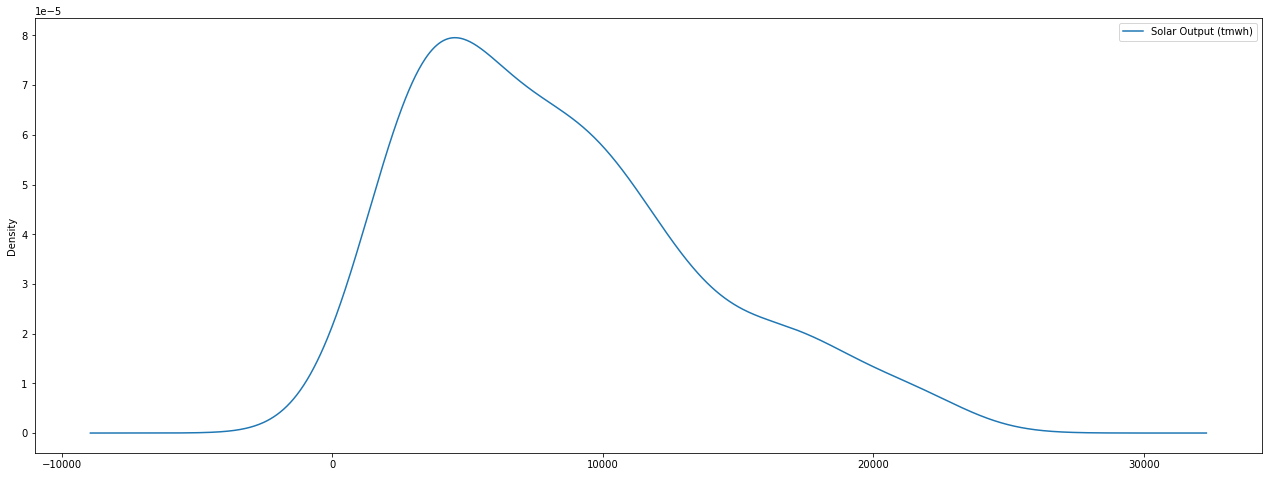

In [19]:
# Plot a density plot for US Solar dataset
us_solar_df.plot(figsize = (22,8), kind='kde');

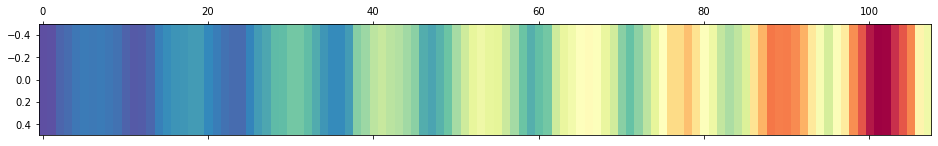

In [20]:
# Transpose the DataFrame
us_year_matrix = us_solar_df.T

# Draw a heatmap with matshow()
plt.matshow(us_year_matrix, aspect='auto', cmap=plt.cm.Spectral_r);

#### NY State Dataframe

In [21]:
ny_solar_df = full_solar_df[full_solar_df['Location'] == "New York"]\
.drop(['Location','units', 'source key'], axis =1).T

In [22]:
ny_solar_df

,10
Jan 2001,--
Feb 2001,--
Mar 2001,--
Apr 2001,--
May 2001,--
...,...
Aug 2022,573
Sep 2022,512
Oct 2022,434
Nov 2022,302


In [23]:
ny_solar_df.index = pd.to_datetime(ny_solar_df.index, format="%b %Y")

In [24]:
ny_solar_df.rename(columns = {10:'Solar Output (tmwh)'}, inplace=True)

In [25]:
ny_solar_df.columns

Index(['Solar Output (tmwh)'], dtype='object')

In [26]:
ny_solar_df

,Solar Output (tmwh)
2001-01-01,--
2001-02-01,--
2001-03-01,--
2001-04-01,--
2001-05-01,--
...,...
2022-08-01,573
2022-09-01,512
2022-10-01,434
2022-11-01,302


In [27]:
ny_solar_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 2001-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Solar Output (tmwh)  264 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [28]:
ny_solar_df['Solar Output (tmwh)'].replace(to_replace='--', value=0, inplace=True)

ny_solar_df['Solar Output (tmwh)']

2001-01-01      0
2001-02-01      0
2001-03-01      0
2001-04-01      0
2001-05-01      0
             ... 
2022-08-01    573
2022-09-01    512
2022-10-01    434
2022-11-01    302
2022-12-01    280
Name: Solar Output (tmwh), Length: 264, dtype: object

In [29]:
ny_solar_df['Solar Output (tmwh)'] = ny_solar_df['Solar Output (tmwh)'].astype(int)

In [30]:
ny_solar_df

,Solar Output (tmwh)
2001-01-01,0
2001-02-01,0
2001-03-01,0
2001-04-01,0
2001-05-01,0
...,...
2022-08-01,573
2022-09-01,512
2022-10-01,434
2022-11-01,302


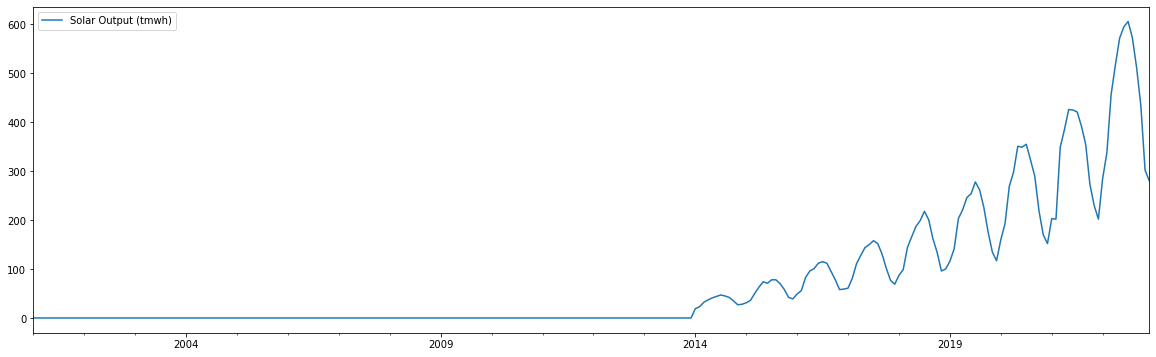

In [31]:
ny_solar_df.plot(figsize = (20,6));

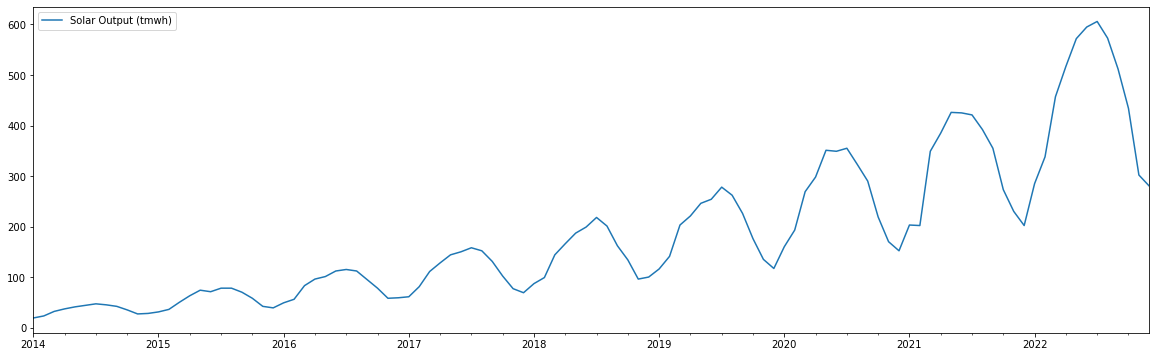

In [32]:
#New dataframe limited to Jan 2014 and afterwards.
ny_solar_df = ny_solar_df.loc['2014-01-01':]

#Plot our data
ny_solar_df.plot(figsize = (20,6));

INTERPRETATION

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [33]:
# code here to prepare your data

#### Test for Stationarity

From simply looking at the data, we can tell it's not stationary, however, let's perform a statistical test (Dickry-Fuller Test) to be sure. 

In [50]:
#Perform a Dickey-Fuller Test

# Extract and display test results in a user friendly manner
def df_printout(data):
    dftest= adfuller(data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#View test results


INTERPRETATION OF ADFULLER TEST

In [51]:
df_printout(us_solar_df)

Test Statistic                  2.525349
p-value                         0.999058
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


INTERPRETATION OF RESULTS

### Eliminating trend in our data

In [35]:
us_roll_mean = us_solar_df.rolling(window=12, center=False).mean()
us_roll_std = us_solar_df.rolling(window=12, center=False).std()

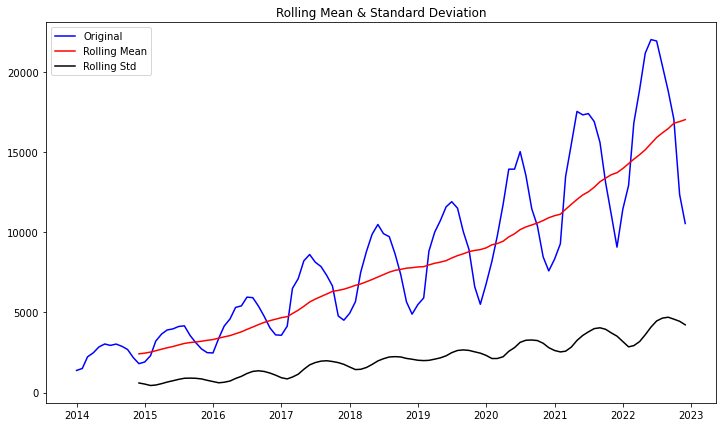

In [36]:
fig = plt.figure(figsize=(12,7))
plt.plot(us_solar_df, color='blue', label='Original')
plt.plot(us_roll_mean, color='red', label='Rolling Mean')
plt.plot(us_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

INTERPRETATION OF GRAPH

### Subtracting Rolling Mean

In [37]:
# Subtract the moving average from the original data
us_solar_minus_roll_mean = us_solar_df - us_roll_mean
us_solar_minus_roll_mean.head(15)

,Solar Output (tmwh)
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,NaN
2014-05-01,NaN
2014-06-01,NaN
2014-07-01,NaN
2014-08-01,NaN
2014-09-01,NaN
2014-10-01,NaN


In [38]:
# Drop the missing values from time series calculated above
us_solar_minus_roll_mean.dropna(inplace=True)

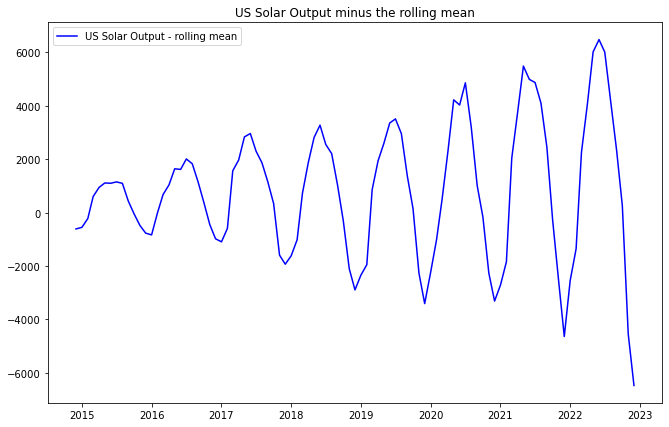

In [39]:
fig = plt.figure(figsize=(11,7))
plt.plot(us_solar_minus_roll_mean, color='blue',label='US Solar Output - rolling mean')
plt.legend(loc='best')
plt.title('US Solar Output minus the rolling mean')
plt.show(block=False)

In [52]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_minus_roll_mean)

Test Statistic                 -0.470908
p-value                         0.897570
#Lags Used                     11.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


INTERPRETATION OF RESULTS

### Differencing

In [41]:
us_solar_diff = us_solar_df.diff(periods=1)
us_solar_diff.head(10)

,Solar Output (tmwh)
2014-01-01,NaN
2014-02-01,124.0
2014-03-01,725.0
2014-04-01,252.0
2014-05-01,366.0
2014-06-01,182.0
2014-07-01,-88.0
2014-08-01,83.0
2014-09-01,-140.0
2014-10-01,-197.0


In [44]:
us_solar_diff.dropna(inplace=True)

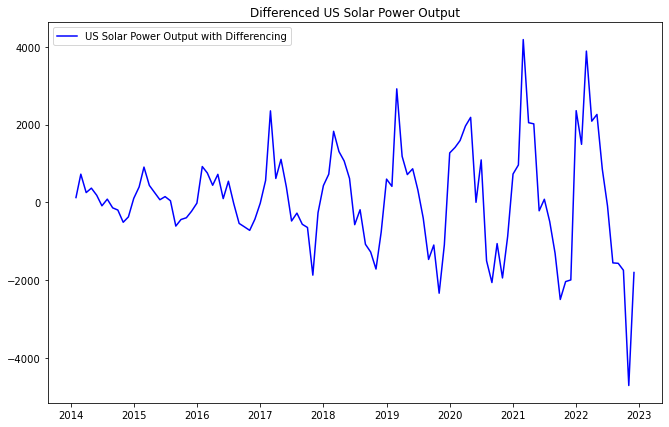

In [45]:
fig = plt.figure(figsize=(11,7))
plt.plot(us_solar_diff, color='blue',label='US Solar Power Output with Differencing')
plt.legend(loc='best')
plt.title('Differenced US Solar Power Output')
plt.show(block=False)

In [53]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_diff)

Test Statistic                 -1.330986
p-value                         0.614880
#Lags Used                     13.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


INTERPRETATION OF RESULTS

### Log Transformation

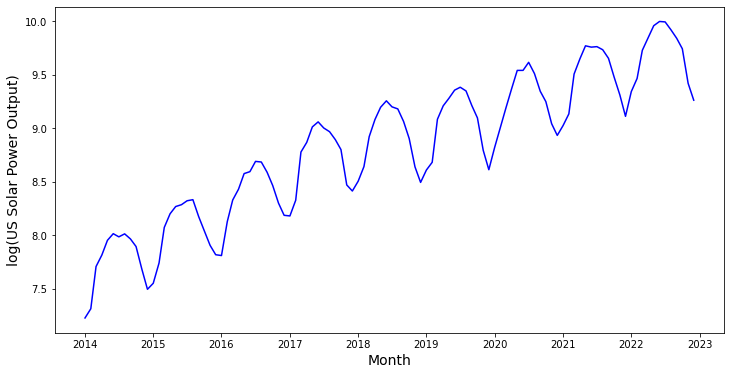

In [73]:
#Log Transform the data
us_solar_log = np.log(us_solar_df)

#Plot the data
fig = plt.figure(figsize=(12,6))
plt.plot(us_solar_log, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(US Solar Power Output)', fontsize=14)
plt.show()

In [56]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_log)

Test Statistic                 -1.876097
p-value                         0.343388
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


INTERPRETATION OF RESULTS

### Square Root Transformation

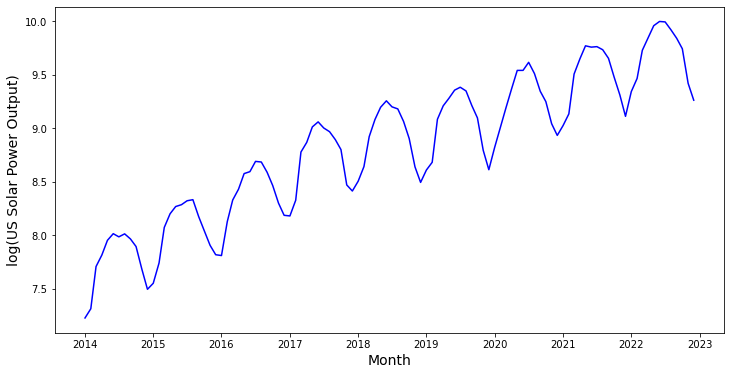

In [74]:
#Square Root Transform the data
us_solar_sqrt = np.sqrt(us_solar_df)

#Plot the data
fig = plt.figure(figsize=(12,6))
plt.plot(us_solar_log, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(US Solar Power Output)', fontsize=14)
plt.show()

In [75]:
#Perform A Dickey-Fuller Test
df_printout(us_solar_sqrt)

Test Statistic                  0.787054
p-value                         0.991424
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


INTERPRETATION OF RESULTS

### Time Series Decomposition

Decompose data and test it stationarity

#### Decomposition on Original Data

In [67]:
#Decompose our original data
decomposition = seasonal_decompose(us_solar_df)
decomposition

In [68]:
# Save the trend, seasonality and noise of decomposed object as variables
trend = decomposition.trend
seasonality = decomposition.seasonal
noise = decomposition.resid

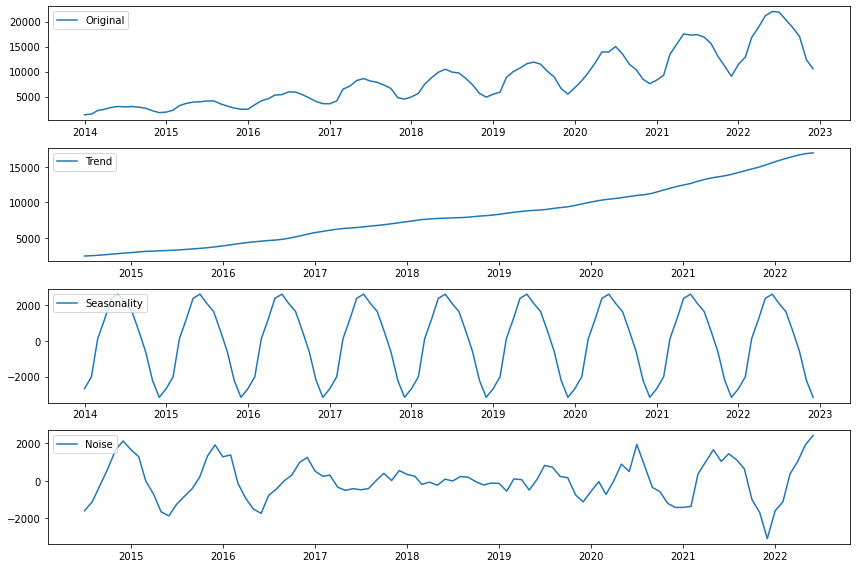

In [69]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(us_solar_df, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='upper left')
plt.tight_layout()

In [70]:
# Drop NaN values from residuals.
us_solar_decompose = noise
us_solar_decompose.dropna(inplace=True)

In [71]:
#Check for stationarity with the Dickey-Fuller Test
df_printout(us_solar_decompose)

Test Statistic                 -5.505656
p-value                         0.000002
#Lags Used                     10.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


INTERPRETATION OF RESULTS

#### Decomposition on Log Transformed Data

Since Log Transforming our data lowered our p-value the most, let's try decomposition again but using our log transformed data this time. 

In [76]:
#Decompose our log transformed data
decomposition = seasonal_decompose(us_solar_log)
decomposition

In [77]:
# Save the trend, seasonality and noise of decomposed object as  variables
trend = decomposition.trend
seasonality = decomposition.seasonal
noise = decomposition.resid

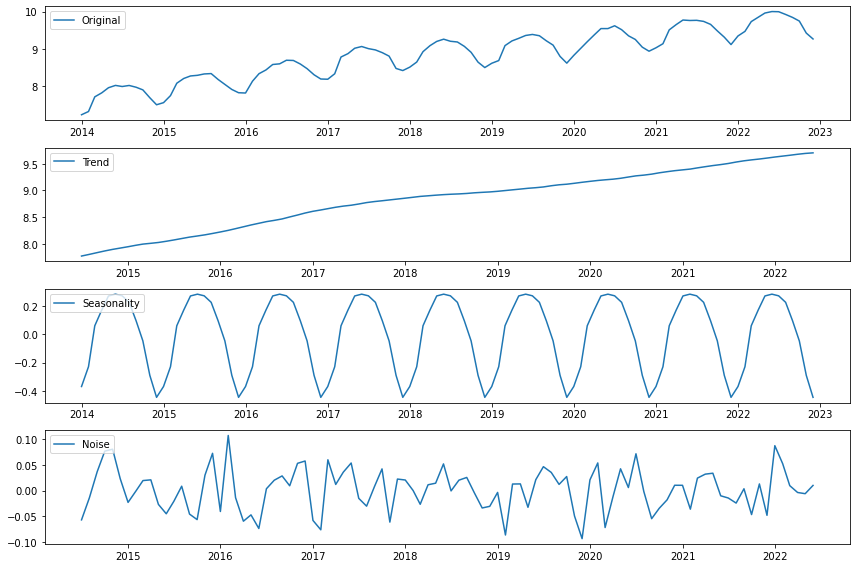

In [78]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(us_solar_log, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='upper left')
plt.tight_layout()

In [79]:
# Drop NaN values from residuals.
us_solar_log_decompose = noise
us_solar_log_decompose.dropna(inplace=True)

In [80]:
#Check for stationarity with the Dickey-Fuller Test
df_printout(us_solar_log_decompose)

Test Statistic                -5.934232e+00
p-value                        2.341465e-07
#Lags Used                     7.000000e+00
Number of Observations Used    8.800000e+01
Critical Value (1%)           -3.506944e+00
Critical Value (5%)           -2.894990e+00
Critical Value (10%)          -2.584615e+00
dtype: float64


INTERPRETATION OF RESULTS

### ACF and PACF

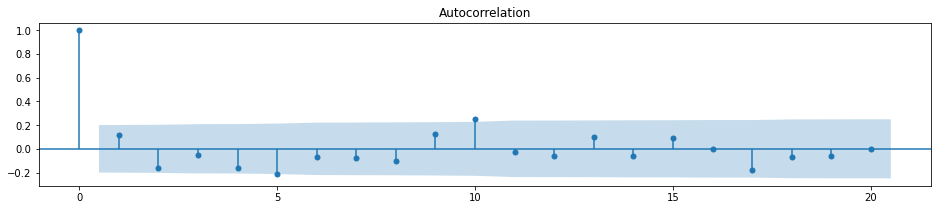

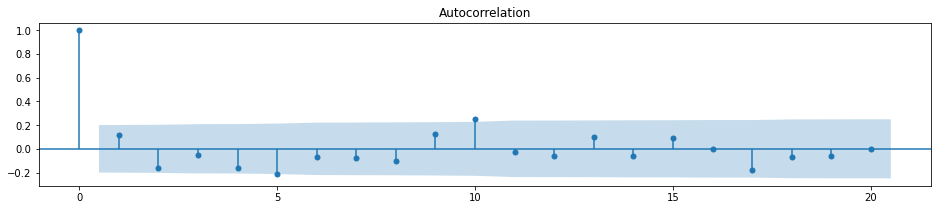

In [82]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(us_solar_log_decompose, ax=ax)

In [ ]:
INTERPRETATION OF RESULTS

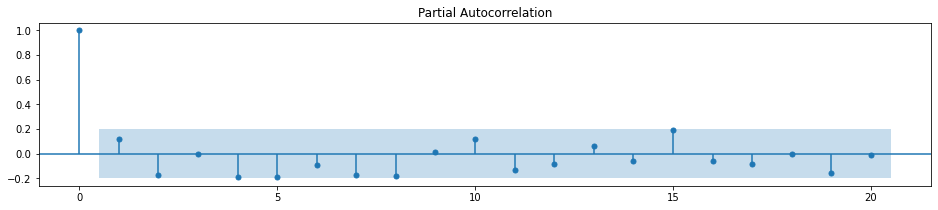

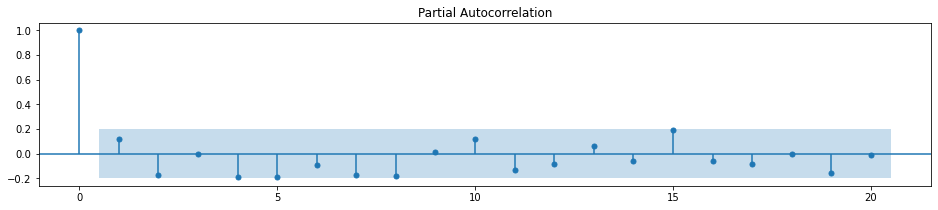

In [83]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(us_solar_log_decompose, ax=ax, method='ywm')

In [ ]:
INTERPRETATION OF RESULTS

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

### Train-Test Split

In [84]:
# find the index which allows us to split off 20% of the data

cutoff = round(us_solar_log_decompose.shape[0]*0.8)
cutoff

77

In [85]:
# Define train and test sets according to the index found above

train = us_solar_log_decompose[:cutoff]

test = us_solar_log_decompose[cutoff:]

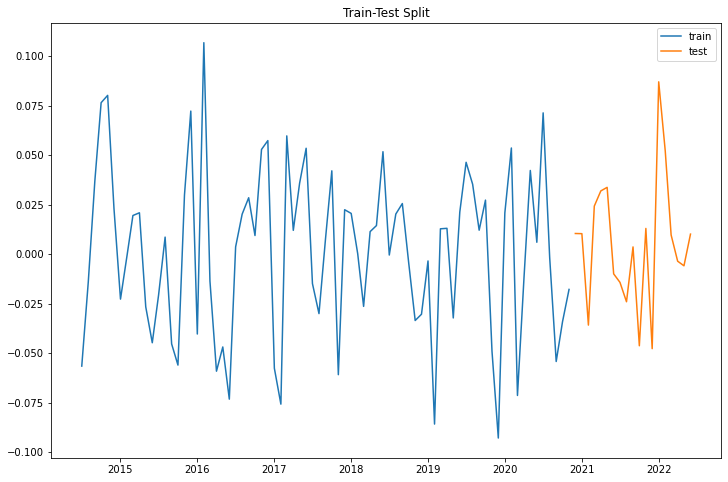

In [86]:
# Plot of our train test split

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

In [89]:
naive = train.shift(1)
naive

2014-07-01         NaN
2014-08-01   -0.056595
2014-09-01   -0.014032
2014-10-01    0.036716
2014-11-01    0.076510
                ...   
2020-07-01    0.005976
2020-08-01    0.071355
2020-09-01   -0.001665
2020-10-01   -0.054270
2020-11-01   -0.034192
Name: resid, Length: 77, dtype: float64

In [90]:
#Root Mean Square Error(RMSE) For our baseline model
print(mean_squared_error(train[1:], naive.dropna(), squared=False))

0.05616957031128276


### Maybe put ACF and PACF here?

### First  Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [88]:
# code here for your first 'substandard' model

# Fit an ARMA(1,0,0) model
AR1 = ARIMA(us_solar_log_decompose, order=(1,0,0))
results_AR1 = AR1.fit()

# Print out summary information on the fit
print(results_AR1.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   96
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 171.233
Date:                Thu, 23 Mar 2023   AIC                           -336.466
Time:                        17:02:16   BIC                           -328.773
Sample:                    07-01-2014   HQIC                          -333.356
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.005      0.367      0.713      -0.008       0.011
ar.L1          0.1190      0.098      1.219      0.223      -0.072       0.310
sigma2         0.0017      0.000      6.413      0.0

In [93]:
# code here to evaluate your first 'substandard' model

#Root Mean Square Error(RMSE) For our first 'substandard' model


### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [34]:
# code here to iteratively improve your models

In [35]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [36]:
# code here to show your final model

In [37]:
# code here to evaluate your final model

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
